In [1]:
import torch
from sklearn.decomposition import PCA
import matplotlib.cm as cm
import matplotlib
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import copy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# tsne_plot_2d('Anna Karenina by Leo Tolstoy', embeddings_ak_2d, a=0.1)

In [2]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import copy
import warnings
# task_embedding = torch.load('task_embedding_chembl.pth').cpu().detach().numpy()
warnings.filterwarnings("ignore")

In [4]:
dataset = '5tasks'
embedding_list = np.load('./embedding_collect/'+ dataset +'_encoder_output_list_sd.npy',allow_pickle=True)
train_visual = embedding_list[-1]
test_visual = embedding_list[-2]
all_comb = np.concatenate((train_visual,test_visual),axis=0)

In [5]:
perf = pd.read_csv('./gain_data/CV_5tasks/5tasksfull_relative.csv',sep=' ',header=None).values
mask = pd.read_csv('./gain_data/CV_5tasks/x.csv',header=None).values
import pickle
visual_mask = np.zeros(all_comb.sum(2).shape)
visual_mask[all_comb.sum(2)!=0]=1
new_index =[]
for i in visual_mask:
    for j in range(len(mask)):
        if((i == mask[j]).all()):
            new_index.append(j)
            continue
perf=perf[new_index]
for i in range(len(perf[0])):
    print(i,len(np.where(perf[:,i]>0)[0]),len(np.where(perf[:,i]<0)[0]))

0 11 4
1 10 5
2 3 12
3 9 6
4 14 1


In [7]:
pred_perf = pd.read_csv('./gain_data/CV_5tasks/CVTAGHOA.csv',sep=' ',header=None).values
mask = pd.read_csv('./gain_data/CV_5tasks/x.csv',header=None).values
visual_mask = np.zeros(all_comb.sum(2).shape)
visual_mask[all_comb.sum(2)!=0]=1
new_index =[]
for i in visual_mask:
    for j in range(len(mask)):
        if((i == mask[j]).all()):
            new_index.append(j)
            continue
TAG_perf=pred_perf[new_index]

In [8]:
pred_perf = pd.read_csv('./gain_data/CV_results/5tasksHOA_relative.csv',sep=' ',header=None).values
mask = pd.read_csv('./gain_data/CV_5tasks/x.csv',header=None).values
visual_mask = np.zeros(all_comb.sum(2).shape)
visual_mask[all_comb.sum(2)!=0]=1
new_index =[]
for i in visual_mask:
    for j in range(len(mask)):
        if((i == mask[j]).all()):
            new_index.append(j)
            continue
HOA_perf=pred_perf[new_index]

In [9]:
import pickle
with open('./log/'+dataset+'/pred_pertask_trajactiveper.pkl', "rb") as fp:   
    pred_traj = pickle.load(fp)
with open('./log/'+dataset+'/mask_pertask_trajactiveper.pkl', "rb") as fp:   
    pred_mask = pickle.load(fp)
pred_perf = np.array(pred_traj)[-1]
mask = np.array(pred_mask)[-1]
visual_mask = np.zeros(all_comb.sum(2).shape)
visual_mask[all_comb.sum(2)!=0]=1
new_index =[]
for i in visual_mask:
    for j in range(len(mask)):
        if((i == mask[j]).all()):
            new_index.append(j)
            continue
pred_perf=pred_perf[new_index]
for i in range(len(perf[0])):
    print(i,len(np.where(perf[:,i]>0)[0]),len(np.where(perf[:,i]<0)[0]))

0 11 4
1 10 5
2 3 12
3 9 6
4 14 1


0
1
2
3
4


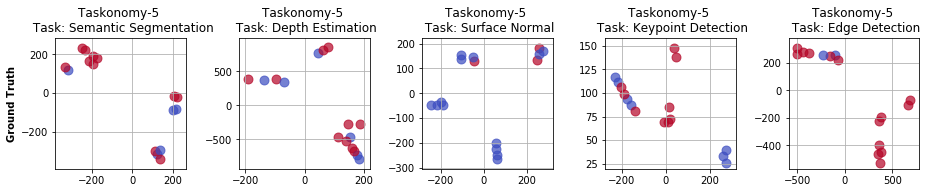

In [16]:
import copy
_perf = copy.deepcopy(perf)
plt.figure(figsize=(15, 15))
figure_idx = 1
# 13可以用
select_task_idx = 2
with_task_idx = 10
for select_task_idx in range(5):
    print(select_task_idx)
    for tmp in [2]:
        plt.subplot(5,5,figure_idx)
        if(figure_idx % 5 == 1):
            plt.gca().set_ylabel('Ground Truth',fontweight="bold")
        a = 0.7
        figure_idx = figure_idx + 1
        _perf = copy.deepcopy(perf)
        sel_idx = np.where(all_comb[:,select_task_idx,:].sum(1)!=0)[0]
        selected_comb = all_comb[sel_idx]
        _perf = _perf[sel_idx]
        
        X = selected_comb[:,select_task_idx,:]
        _perf = _perf[:,select_task_idx]
        for i in range(len(_perf)):
            if(_perf[i]>0):
                _perf[i] = _perf[i]/np.max(_perf[i])
            else:
                _perf[i] = -1*(_perf[i]/np.min(_perf[i]))
        X_embedded = TSNE(n_components=2,perplexity=tmp, random_state=3).fit_transform(X)
        keys = list(range(len(X)))
        title = 'Taskonomy-5 \n Task: '+ all_task[select_task_idx]
        color=_perf
        embeddings = X_embedded
        label = keys
        plt.title(title)
        x = embeddings[:,0]
        y = embeddings[:,1]
        cmap = matplotlib.cm.get_cmap('coolwarm')
        c = color
        # cm.get_cmap('tab20c')(np.linspace(0, 1, len(y)))
        plt.grid(True)
        for i in range(len(x)):
            plt.scatter(x[i], y[i], alpha=a,color=cmap(c[i]), label=label[i],s=80)
plt.subplots_adjust(left=0.1,
                bottom=0.1, 
                right=0.9, 
                top=0.9, 
                wspace=0.4, 
                hspace=0.4)
# plt.savefig('ETTm1.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()
    # task_embedd_c =tsne_plot_2d(keys,X_embedded,title='Task Representation, MIMIC-27 Task '+str(select_task_idx),color=_perf,show_legend=False,save_fig = False,anchor_xy = [1.05, 0.9],col=4)

0
(-396.12219296059675, 291.7547636088916)
1
(-954.4539350050857, 1010.2026948927089)
2
(-310.04721886882317, 229.2617260816437)
3
(19.596870148216496, 159.81173149932113)
4
(-569.9794555851998, 392.4220791642718)


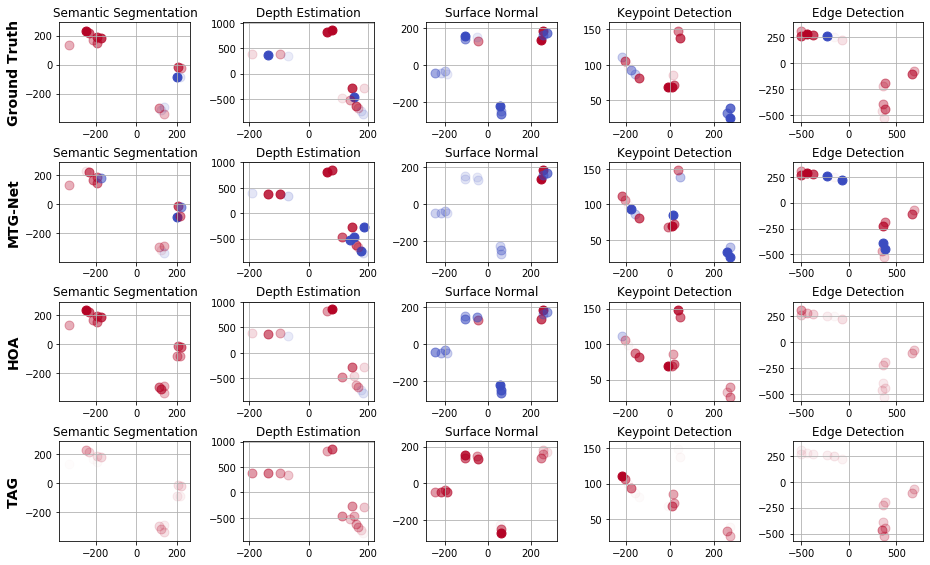

In [19]:
import copy
_perf = copy.deepcopy(perf)
# 10 7
# 27 3
fig = plt.figure(figsize=(15,9))
figure_idx = 1
# 13可以用
# 15可以用
select_task_idx = 2
with_task_idx = 10
for select_task_idx in range(5):
    print(select_task_idx)
    for tmp in [2]:
        a = 0.7
        _perf = copy.deepcopy(perf)
        sel_idx = np.where(all_comb[:,select_task_idx,:].sum(1)!=0)[0]
        selected_comb = all_comb[sel_idx]
        _perf = copy.deepcopy(perf)
        _pred_perf = copy.deepcopy(pred_perf)
        _HOA_perf = copy.deepcopy(HOA_perf)
        _TAG_perf = copy.deepcopy(TAG_perf)
        sel_idx = np.where(all_comb[:,select_task_idx,:].sum(1)!=0)[0]
        selected_comb = all_comb[sel_idx]
        _perf = _perf[sel_idx]
        _pred_perf = _pred_perf[sel_idx]
        _HOA_perf = _HOA_perf[sel_idx]
        _TAG_perf = _TAG_perf[sel_idx]
        _a = copy.deepcopy(_perf[:,select_task_idx])
        _perf = _perf[:,select_task_idx]
        perf_max,perf_min = np.max(_perf), np.min(_perf)
        TAG_max,TAG_min = np.max(_TAG_perf), np.min(_TAG_perf)
        _a_pred = copy.deepcopy(_pred_perf[:,select_task_idx])
        _pred_perf = _pred_perf[:,select_task_idx]
        _a_HOA = copy.deepcopy(_HOA_perf[:,select_task_idx])
        _HOA_perf = _HOA_perf[:,select_task_idx]
        _a_TAG = copy.deepcopy(_TAG_perf[:,select_task_idx])
        _TAG_perf = _TAG_perf[:,select_task_idx]
        label, pred_label, HOA_label, TAG_label = [] , [] , [] ,[]
        X = selected_comb[:,select_task_idx,:]
        for i in range(len(_perf)):
            if(_perf[i]>=0):
                _perf[i] = 1
                _a[i] = _a[i]/(perf_max+0.00001)
                label.append('positive')
            else:
                _perf[i] = -0.5
                _a[i] = _a[i]/(perf_min-0.00001) + 0.1
                label.append('negative')
            if(_a[i]>0.99):
                _a[i] = 1
        for i in range(len(_pred_perf)):
            if(_pred_perf[i]>=0):
                _pred_perf[i] = 1
                _a_pred[i] = _a_pred[i]/(perf_max+0.00001)
                pred_label.append('positive')
            else:
                _pred_perf[i] = -0.5
                _a_pred[i] = _a_pred[i]/(perf_min-0.00001) + 0.1
                pred_label.append('negative')
            if(_a_pred[i]>0.99):
                _a_pred[i] = 1
        for i in range(len(_HOA_perf)):
            if(_HOA_perf[i]>=0):
                _HOA_perf[i] = 1
                _a_HOA[i] = _a_HOA[i]/(perf_max+0.00001)
                HOA_label.append('positive')
            else:
                _HOA_perf[i] = -0.5
                _a_HOA[i] = _a_HOA[i]/(perf_min-0.00001) + 0.1
                HOA_label.append('negative')
            if(_a_HOA[i]>0.99):
                _a_HOA[i] = 1
        for i in range(len(_TAG_perf)):
            if(_TAG_perf[i]>=0):
                _TAG_perf[i] = 1
                TAG_label.append('positive')
                _a_TAG[i] = (_a_TAG[i]+0.0001)/TAG_max
            else:
                _TAG_perf[i] = -0.5
                _a_TAG[i] = (_a_TAG[i]+0.0001)/TAG_min + 0.1
                TAG_label.append('negative')
            if(_a_TAG[i]>=0.99):
                _a_TAG[i] = 1
        # _perf = (_perf-np.min(_perf))/(np.max(_perf)-np.min(_perf))
        # X = all_comb[np.where(all_comb[:,with_task_idx,:].sum(1)!=0)]
        X_embedded = TSNE(n_components=2,perplexity=tmp, random_state=3).fit_transform(X)
        keys = list(range(len(X)))
        embeddings = X_embedded
        c=_perf
        x = embeddings[:,0]
        y = embeddings[:,1]
        cmap = matplotlib.cm.get_cmap('coolwarm')
        # cm.get_cmap('tab20c')(np.linspace(0, 1, len(y)))
        plt.subplot(4,5,figure_idx)
        plt.grid(True)
        plt.title(all_task[select_task_idx])
        for i in range(len(x)):
            plt.scatter(x[i], y[i], alpha=_a[i],color=cmap(c[i]), label=label[i],s=80)
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        # plt.legend(by_label.values(), by_label.keys())
        print(plt.gca().get_ylim())
        if(figure_idx % 5 == 1):
            plt.gca().set_ylabel('Ground Truth',fontweight="bold",fontsize=14)
        plt.subplot(4,5,figure_idx+5)
        plt.grid(True)
        plt.title(all_task[select_task_idx])
        for i in range(len(x)):
            plt.scatter(x[i], y[i], alpha=_a_pred[i],color=cmap(_pred_perf[i]), label=pred_label[i],s=80)
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        # plt.legend(by_label.values(), by_label.keys())
        if(figure_idx % 5 == 1):
            plt.gca().set_ylabel('MTG-Net',fontweight="bold",fontsize=14)
        plt.subplot(4,5,figure_idx+10)
        plt.grid(True)
        plt.title(all_task[select_task_idx])
        for i in range(len(_HOA_perf)):
            plt.scatter(x[i], y[i], alpha=_a_HOA[i],color=cmap(_HOA_perf[i]), label=HOA_label[i],s=80)
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        # plt.legend(by_label.values(), by_label.keys())
        if(figure_idx % 5 == 1):
            plt.gca().set_ylabel('HOA',fontweight="bold",fontsize=14)
        plt.subplot(4,5,figure_idx+15)
        plt.grid(True)
        plt.title(all_task[select_task_idx])
        for i in range(len(_TAG_perf)):
            plt.scatter(x[i], y[i], alpha=_a_TAG[i],color=cmap(_TAG_perf[i]), label=TAG_label[i],s=80)
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        # plt.legend(by_label.values(), by_label.keys())
        if(figure_idx % 5 == 1):
            plt.gca().set_ylabel('TAG',fontweight="bold",fontsize=14)
        figure_idx = figure_idx + 1
        
plt.subplots_adjust(left=0.1,
                bottom=0.1, 
                right=0.9, 
                top=0.9, 
                wspace=0.4, 
                hspace=0.4)
plt.savefig('./embed_visual/Taskonomy_comparison.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()
    # task_embedd_c =tsne_plot_2d(keys,X_embedded,title='Task Representation, MIMIC-27 Task '+str(select_task_idx),color=_perf,show_legend=False,save_fig = False,anchor_xy = [1.05, 0.9],col=4)

0
(-396.12219296059675, 291.7547636088916)
1
(-954.4539350050857, 1010.2026948927089)
2
(-310.04721886882317, 229.2617260816437)
3
(19.596870148216496, 159.81173149932113)
4
(-569.9794555851998, 392.4220791642718)


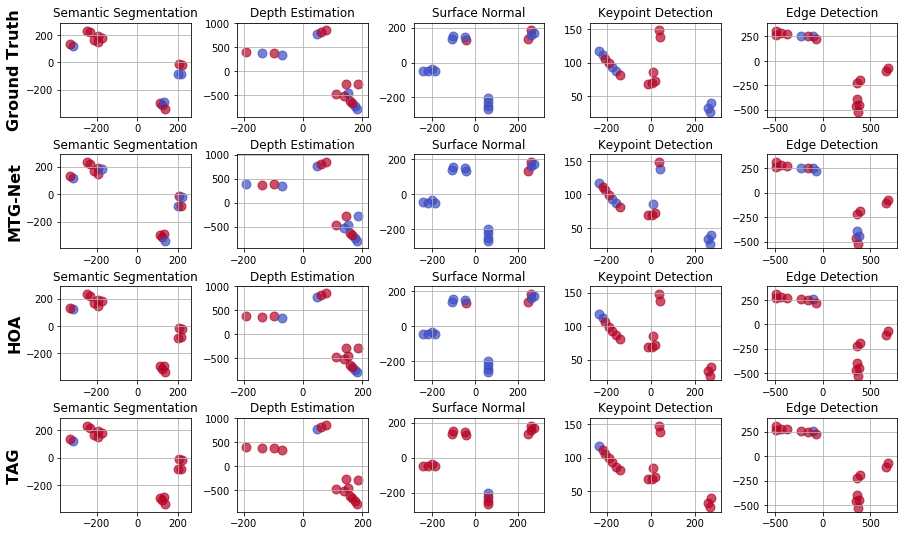

In [16]:
import copy
_perf = copy.deepcopy(perf)
plt.figure(figsize=(15,9))
figure_idx = 1
for select_task_idx in range(5):
    print(select_task_idx)
    tmp = 2
    a = 0.7
    _perf = copy.deepcopy(perf)
    _pred_perf = copy.deepcopy(pred_perf)
    _HOA_perf = copy.deepcopy(HOA_perf)
    _TAG_perf = copy.deepcopy(TAG_perf)
    sel_idx = np.where(all_comb[:,select_task_idx,:].sum(1)!=0)[0]
    selected_comb = all_comb[sel_idx]
    _perf = _perf[sel_idx]
    _pred_perf = _pred_perf[sel_idx]
    _HOA_perf = _HOA_perf[sel_idx]
    _TAG_perf = _TAG_perf[sel_idx]
    X = selected_comb[:,select_task_idx,:]
    _perf = _perf[:,select_task_idx]
    _pred_perf = _pred_perf[:,select_task_idx]
    _HOA_perf = _HOA_perf[:,select_task_idx]
    _TAG_perf = _TAG_perf[:,select_task_idx]
    for i in range(len(_perf)):
        if(_perf[i]>0):
            _perf[i] = 1
        else:
            _perf[i] = -0.5
    for i in range(len(_pred_perf)):
        if(_pred_perf[i]>0):
            _pred_perf[i] = 1
        else:
            _pred_perf[i] = -0.5
    for i in range(len(_HOA_perf)):
        if(_HOA_perf[i]>0):
            _HOA_perf[i] = 1
        else:
            _HOA_perf[i] = -0.5
    for i in range(len(_TAG_perf)):
        if(_TAG_perf[i]>0):
            _TAG_perf[i] = 1
        else:
            _TAG_perf[i] = -0.5
    # _perf = (_perf-np.min(_perf))/(np.max(_perf)-np.min(_perf))
    # X = all_comb[np.where(all_comb[:,with_task_idx,:].sum(1)!=0)]
    X_embedded = TSNE(n_components=2,perplexity=tmp, random_state=3).fit_transform(X)
    keys = list(range(len(X)))
    embeddings = X_embedded
    label = keys
    c=_perf
    x = embeddings[:,0]
    y = embeddings[:,1]
    cmap = matplotlib.cm.get_cmap('coolwarm')
    # cm.get_cmap('tab20c')(np.linspace(0, 1, len(y)))
    plt.subplot(4,5,figure_idx)
    plt.grid(True)
    plt.title(all_task[select_task_idx])
    for i in range(len(x)):
        plt.scatter(x[i], y[i], alpha=a,color=cmap(c[i]), label=label[i],s=80)
    print(plt.gca().get_ylim())
    if(figure_idx % 5 == 1):
        plt.gca().set_ylabel('Ground Truth',fontweight="bold",fontsize=16)
    plt.subplot(4,5,figure_idx+5)
    plt.grid(True)
    plt.title(all_task[select_task_idx])
    for i in range(len(x)):
        plt.scatter(x[i], y[i], alpha=a,color=cmap(_pred_perf[i]), label=label[i],s=80)
    if(figure_idx % 5 == 1):
        plt.gca().set_ylabel('MTG-Net',fontweight="bold",fontsize=16)
    plt.subplot(4,5,figure_idx+10)
    plt.grid(True)
    plt.title(all_task[select_task_idx])
    for i in range(len(_HOA_perf)):
        plt.scatter(x[i], y[i], alpha=a,color=cmap(_HOA_perf[i]), label=label[i],s=80)
    if(figure_idx % 5 == 1):
        plt.gca().set_ylabel('HOA',fontweight="bold",fontsize=16)
    plt.subplot(4,5,figure_idx+15)
    plt.grid(True)
    plt.title(all_task[select_task_idx])
    for i in range(len(_TAG_perf)):
        plt.scatter(x[i], y[i], alpha=a,color=cmap(_TAG_perf[i]), label=label[i],s=80)
    if(figure_idx % 5 == 1):
        plt.gca().set_ylabel('TAG',fontweight="bold",fontsize=16)
    figure_idx = figure_idx + 1
plt.subplots_adjust(wspace=0.35, 
                hspace=0.4)
plt.savefig('./embed_visual/Taskonomy5_comparison.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()
    # task_embedd_c =tsne_plot_2d(keys,X_embedded,title='Task Representation, MIMIC-27 Task '+str(select_task_idx),color=_perf,show_legend=False,save_fig = False,anchor_xy = [1.05, 0.9],col=4)=pred_perf[new_index]

In [10]:
all_task = ['Semantic Segmentation','Depth Estimation','Surface Normal','Keypoint Detection','Edge Detection']